In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading data

cust_data = pd.read_csv("cust_demographics.csv")
claim_data = pd.read_csv("claims.csv")

In [3]:
print(cust_data.shape)
print(claim_data.shape)

(1085, 6)
(1100, 10)


In [4]:
cust_data.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [5]:
claim_data.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [6]:
# renaming the column

cust_data.rename(columns={"CUST_ID":"customer_id"}, inplace=True)

In [7]:
cust_data.head()

,customer_id,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [8]:
# merging two both data frames

df = pd.merge(left=claim_data, right=cust_data, on="customer_id", how="left")


In [9]:
df.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,Female,11-Mar-84,TN,798-631-4758,Silver
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,Female,01-May-86,MA,413-187-7945,Silver
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No,Male,13-May-77,NV,956-871-8691,Gold


In [10]:
df.shape

(1100, 15)

In [11]:
df.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,Female,11-Mar-84,TN,798-631-4758,Silver
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,Female,01-May-86,MA,413-187-7945,Silver
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No,Male,13-May-77,NV,956-871-8691,Gold


In [12]:
# checking info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   int64  
 1   customer_id          1100 non-null   int64  
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   object 
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
 10  gender               1085 non-null   object 
 11  DateOfBirth          1085 non-null   object 
 12  State                1085 non-null   object 
 13  Contact              1085 non-null   object 
 14  Segment              1085 non-null   object 
dtypes: float64(1), int64(2), object(12)
me

### Observations
- There are some null values available in the data.
- claim_date is in incorrect format.
- claim_amount is in incorrect data type.
- Date of birth is in incorrect format and column's name is also.

In [13]:
# changing data type of columns
# replacing $ sign with nothing

df["claim_amount"] = df["claim_amount"].str.replace("$", "", regex=False).astype(float)
df["claim_date"] = pd.to_datetime(df["claim_date"], format="%m/%d/%Y")
df.rename(columns={"DateOfBirth":"DOB"}, inplace=True)
df["DOB"] = pd.to_datetime(df["DOB"], format="%d-%b-%y")


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1100 non-null   int64         
 1   customer_id          1100 non-null   int64         
 2   incident_cause       1100 non-null   object        
 3   claim_date           1100 non-null   datetime64[ns]
 4   claim_area           1100 non-null   object        
 5   police_report        1100 non-null   object        
 6   claim_type           1100 non-null   object        
 7   claim_amount         1035 non-null   float64       
 8   total_policy_claims  1090 non-null   float64       
 9   fraudulent           1100 non-null   object        
 10  gender               1085 non-null   object        
 11  DOB                  1085 non-null   datetime64[ns]
 12  State                1085 non-null   object        
 13  Contact              1085 non-nul

In [15]:
# checking null values

df.isnull().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
gender                 15
DOB                    15
State                  15
Contact                15
Segment                15
dtype: int64

- There are null values in the data

In [16]:
(df.isnull().sum()/len(df))*100

claim_id               0.000000
customer_id            0.000000
incident_cause         0.000000
claim_date             0.000000
claim_area             0.000000
police_report          0.000000
claim_type             0.000000
claim_amount           5.909091
total_policy_claims    0.909091
fraudulent             0.000000
gender                 1.363636
DOB                    1.363636
State                  1.363636
Contact                1.363636
Segment                1.363636
dtype: float64

- Null values are more than 5% in claim amount column.
- Except claim_amount column we can drop the null values.

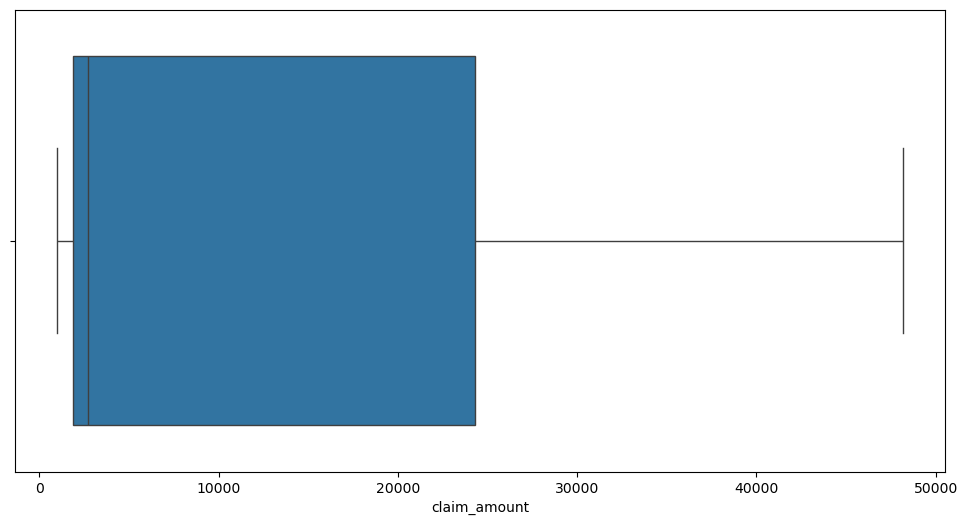

In [17]:
# checking if there are any outliers in the claim column

plt.figure(figsize=(12,6))
sns.boxplot(df, x= df["claim_amount"])
plt.show()

- There are no outliers in the claim_column.

In [18]:
# replacing claim columns null values with mean

df["claim_amount"].mean()

12442.125120772947

In [19]:
df["claim_amount"].median()

2740.0

In [20]:
# droping null values

df.dropna(inplace=True)

In [21]:
# filling claim_amount

df["claim_amount"] = df["claim_amount"].fillna(df["claim_amount"].mean())


In [22]:
df.isnull().sum()

claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
gender                 0
DOB                    0
State                  0
Contact                0
Segment                0
dtype: int64

- There are no null values in the data now.

### Understanding each column

In [23]:
df["incident_cause"].unique()

array(['Driver error', 'Crime', 'Other driver error', 'Natural causes',
       'Other causes'], dtype=object)

In [24]:
print(df["claim_date"].min())
print(df["claim_date"].max())

2017-01-01 00:00:00
2018-10-30 00:00:00


In [25]:
df["claim_area"].unique()

array(['Auto', 'Home'], dtype=object)

In [26]:
df["police_report"].unique()

array(['No', 'Unknown', 'Yes'], dtype=object)

In [27]:
df["claim_type"].unique()

array(['Material only', 'Injury only', 'Material and injury'],
      dtype=object)

In [28]:
print(df["claim_amount"].min())
print(df["claim_amount"].max())

1000.0
48150.5


In [29]:
df["total_policy_claims"].unique()

array([1., 3., 4., 2., 5., 7., 6., 8.])

In [30]:
df["fraudulent"].unique()

array(['No', 'Yes'], dtype=object)

In [31]:
df["gender"].unique()

array(['Female', 'Male'], dtype=object)

In [32]:
print(df["DOB"].min())
print(df["DOB"].max())

1969-01-01 00:00:00
2068-12-15 00:00:00


- There are some incorrect DOB. 

In [33]:
df["State"].unique()
df["State"].nunique()

50

In [34]:
df["Segment"].unique()

array(['Platinum', 'Silver', 'Gold'], dtype=object)

4. Of all the injury claims, some of them have gone unreported with the
police. Create an alert flag (1,0) for all such claims.

In [37]:
df['police_report'].unique()

array(['No', 'Unknown', 'Yes'], dtype=object)

In [38]:
df['unreported'] = [1 if claim == 'Unknown' else 0 for claim in df['police_report']]

df.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DOB,State,Contact,Segment,unreported
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,0
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver,1
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,798-631-4758,Silver,0
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver,0
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,Male,1977-05-13,NV,956-871-8691,Gold,0


In [40]:
df.shape

(1011, 16)

5. One customer can claim for insurance more than once and in each claim,
multiple categories of claims can be involved. However, customer ID
should remain unique. Retain the most recent observation and delete any duplicated records in
the data based on the customer ID column.

In [41]:
df.drop_duplicates(subset='customer_id', inplace=True)

6. Check for missing values and impute the missing values with an
appropriate value. (mean for continuous and mode for categorical)

In [42]:
df.isnull().sum()

claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
gender                 0
DOB                    0
State                  0
Contact                0
Segment                0
unreported             0
dtype: int64

- There no missing values.

Calculate the age of customers in years. Based on the age, categorize the
customers according to the below criteria.  
- Children < 18
- Youth 18-30
- Adult 30-60
- Senior > 60

In [55]:
# Calculate age in years

today = pd.Timestamp.today()
df['age'] = df['DOB'].apply(lambda x: today.year - x.year - ((today.month, today.day) < (x.month, x.day)))

In [56]:
df.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DOB,State,Contact,Segment,unreported,age
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,0,46
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver,1,55
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,798-631-4758,Silver,0,41
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver,0,39
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,Male,1977-05-13,NV,956-871-8691,Gold,0,48


In [48]:
def categorize_age(age):
    if age < 18:
        return 'Children'
    elif 18 <= age < 30:
        return 'Youth'
    elif 30 <= age <= 60:
        return 'Adult'
    else:
        return 'Senior'

In [57]:
df['category'] = df['age'].apply(categorize_age)

In [58]:
df['category'].unique()

array(['Adult', 'Youth', 'Children'], dtype=object)

In [59]:
df['age'].unique()

array([ 46,  55,  41,  39,  48,  26,  25,  31, -42,  34, -39,  56,  47,
        38, -41,  45,  50,  43,  30,  40,  28, -38, -43,  53,  36,  49,
        35,  29,  54, -44, -36, -37,  37,  52,  33, -35,  27,  42,  44,
       -40,  32,  51])

In [54]:
df.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DOB,State,Contact,Segment,unreported
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,0
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver,1
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,798-631-4758,Silver,0
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver,0
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,Male,1977-05-13,NV,956-871-8691,Gold,0
